## overview

In [1]:
# default package
import logging
import sys 
import os
import pathlib
import IPython
import random
from urllib.request import urlretrieve

In [2]:
# third party package
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from tqdm import tqdm
import seaborn as sns
# torch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets
from torchvision import transforms

In [3]:
# my package
sys.path.append(os.path.join(pathlib.Path().resolve(),"../"))

In [4]:
# reload settings
%load_ext autoreload
%autoreload 2

In [5]:
# logger
logger=logging.getLogger(__name__)
logging.basicConfig(level=logging.ERROR)

In [6]:
# graph setting
sns.set()

In [7]:
# gpu
torch.cuda.is_available()

True

In [8]:
# global parameter
DATA_DIR="../dlwpt-code/data/"

## data

In [9]:
data_path = './data'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True) 
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True) 

Files already downloaded and verified
Files already downloaded and verified


In [10]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [11]:
img, label = cifar10[99]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F8809FCDC70>,
 1,
 'automobile')

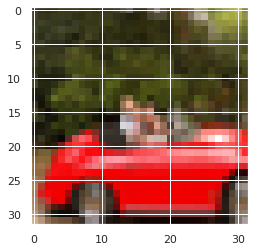

In [12]:
plt.imshow(img);

## 変換

In [13]:
to_tensor=transforms.ToTensor()
img_t=to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [14]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                          transform=transforms.ToTensor())
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)

In [15]:
imgs.view(3,-1).mean(1),imgs.view(3,-1).std(1)

(tensor([0.4914, 0.4822, 0.4465]), tensor([0.2470, 0.2435, 0.2616]))

In [16]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4914, 0.4822, 0.4465),(0.2470, 0.2435, 0.2616))
                          ])
                              )

## 画像分類

### dataset

In [17]:
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [18]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in cifar10 
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

In [19]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.Softmax(dim=1))

In [20]:
img, _ = cifar2[0]
img_batch = img.view(-1).unsqueeze(0) #1次元化&バッチ次元追加

In [21]:
out=model(img_batch)
_,index=torch.max(out,dim=1)
index

tensor([1])

### training

In [22]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()

n_epochs = 1

for epoch in range(n_epochs):
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 3.338710


### data loader 

In [23]:
batch_size=64
train_loader=torch.utils.data.DataLoader(cifar2,batch_size=batch_size,shuffle=True)

In [24]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()

n_epochs = 1

for epoch in range(n_epochs):
    for img, label in (train_loader):
        batch_size=img.shape[0]
        out = model(img.view(batch_size,-1))
        loss = loss_fn(out, label)
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.668839


In [25]:
val_loader=torch.utils.data.DataLoader(cifar2_val,batch_size=batch_size,shuffle=True)

## 演習問題

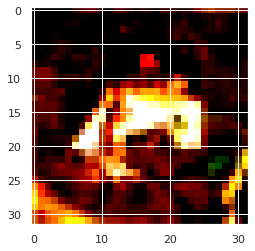

In [26]:
img,_=cifar10[0]
plt.imshow(img.permute(1,2,0));

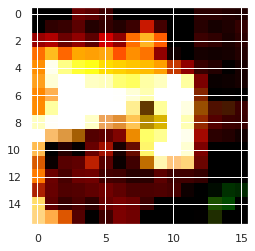

In [27]:
crop=transforms.RandomCrop((16,16))
img_t=crop(img)
plt.imshow(img_t.permute(1,2,0));

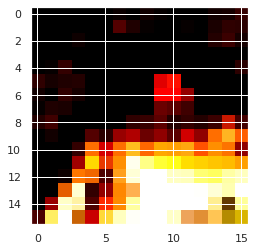

In [28]:
crop=transforms.RandomCrop((16,16))
img_t=crop(img)
plt.imshow(img_t.permute(1,2,0));